In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statannot import add_stat_annotation



plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['figure.figsize']=(8,8) #rescale figures

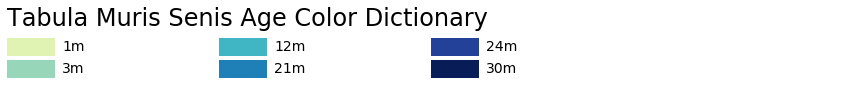

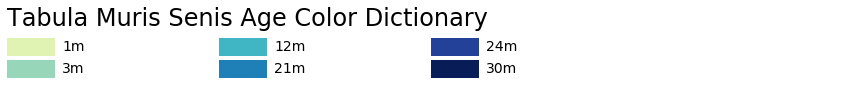

In [46]:
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    by_hsv = [(v, k) for k, v in colors.items()]
    
    if sort_colors is True:
        by_hsv = sorted(by_hsv)
    names = [name for hsv, name in by_hsv]

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

# plot_colortable(maca_color_dict, "Tabula Muris Senis Color Dictionary", sort_colors=False, emptycols=1)


def age_color_dict():
    ages = ['1m','3m','12m','21m','24m','30m']
    
    import matplotlib.colors as pltcolors
    
    cmap = plt.cm.get_cmap("YlGnBu")
        
    age_color_dict = {}
    j=1/len(ages)
    for a in ages:
        age_color_dict[a] = pltcolors.to_hex(cmap(j))
        j+=1/len(ages)
        
 
    return age_color_dict

age_color_dict = age_color_dict()

plot_colortable(age_color_dict, "Tabula Muris Senis Age Color Dictionary", sort_colors=False, emptycols=1)


In [64]:
kupffer = pd.read_csv('./Kupffer_cell_STARFISH.csv')
kupffer = kupffer.set_index('Index')
kupffer

,Clec4f,Il1b,fov,Age,Sample
Index,,,,,
Cell_1296,16,0,0,12m,n1
Cell_1329,12,0,0,12m,n1
Cell_1306,11,0,0,12m,n1
Cell_1286,10,0,0,12m,n1
Cell_1254,9,1,0,12m,n1
...,...,...,...,...,...
Cell_10641,1,0,44,3m,n3
Cell_10642,1,0,44,3m,n3
Cell_10651,1,0,44,3m,n3


In [65]:
df = kupffer.groupby(['Age','Sample'])['Clec4f'].agg({'Clec4f':np.sum})
df1 = kupffer.groupby(['Age','Sample'])['fov'].agg({'fov':np.max})
df2 = kupffer.groupby(['Age','Sample'])['Il1b'].agg({'Il1b':np.sum})
df = df.reset_index()
df1 = df1.reset_index()
df2 = df2.reset_index()
df['Il1b'] = df2['Il1b']
df['fov'] = df1['fov']+1
df['Clec4f/fov'] = df['Clec4f']/df['fov']
df['Il1b/fov'] = df['Il1b']/df['fov']
df['Il1b/Clec4f'] = df['Il1b']/df['Clec4f']
del df1,df2
df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This i

,Age,Sample,Clec4f,Il1b,fov,Clec4f/fov,Il1b/fov,Il1b/Clec4f
0,12m,n1,4814,789,45,106.977778,17.533333,0.163897
1,12m,n2,4766,2127,48,99.291667,44.312500,0.446286
2,12m,n3,3546,1239,48,73.875000,25.812500,0.349408
3,30m,n1,4499,2419,45,99.977778,53.755556,0.537675
4,30m,n2,4644,2902,48,96.750000,60.458333,0.624892
5,30m,n3,2009,1488,44,45.659091,33.818182,0.740667
6,3m,n1,3419,535,44,77.704545,12.159091,0.156479
7,3m,n2,3796,772,44,86.272727,17.545455,0.203372
8,3m,n3,2513,476,45,55.844444,10.577778,0.189415


pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3m v.s. 12m: Welch's t-test independent samples, P_val=2.111e-01 stat=-1.490e+00
12m v.s. 30m: Welch's t-test independent samples, P_val=5.759e-01 stat=6.219e-01
3m v.s. 30m: Welch's t-test independent samples, P_val=7.293e-01 stat=-3.801e-01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3m v.s. 12m: Welch's t-test independent samples, P_val=1.777e-01 stat=-1.928e+00
12m v.s. 30m: Welch's t-test independent samples, P_val=1.483e-01 stat=-1.788e+00
3m v.s. 30m: Welch's t-test independent samples, P_val=3.878e-02 stat=-4.341e+00
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3m v.s. 12m: Welch's t-t

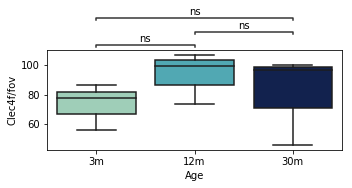

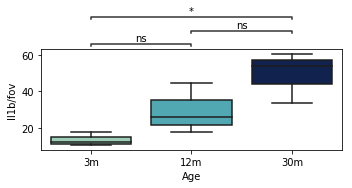

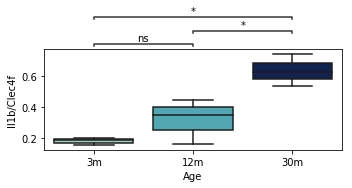

In [61]:
plt.figure(figsize=(5, 3))
g = sns.boxplot(data = df, order = ['3m','12m','30m'],
           x = 'Age', y='Clec4f/fov', palette=age_color_dict)
add_stat_annotation(g,data=df, x = 'Age', y='Clec4f/fov', order = ['3m','12m','30m'],
                        box_pairs=[('3m','12m'),('12m','30m'),('3m','30m')],
                        test='t-test_welch', loc='outside', verbose=2, text_format='star')
plt.tight_layout()
plt.savefig('./Kupffer_validation_Clec4f.pdf')

plt.figure(figsize=(5, 3))
h = sns.boxplot(data = df, order = ['3m','12m','30m'],
           x = 'Age', y='Il1b/fov', palette=age_color_dict)
add_stat_annotation(h,data=df, x = 'Age', y='Il1b/fov', order = ['3m','12m','30m'],
                        box_pairs=[('3m','12m'),('12m','30m'),('3m','30m')],
                        test='t-test_welch', loc='outside', verbose=2, text_format='star')
plt.tight_layout()
plt.savefig('./Kupffer_validation_Il1b.pdf')

plt.figure(figsize=(5, 3))
k = sns.boxplot(data = df, order = ['3m','12m','30m'],
           x = 'Age', y='Il1b/Clec4f', palette=age_color_dict)
add_stat_annotation(k,data=df, x = 'Age', y='Il1b/Clec4f', order = ['3m','12m','30m'],
                        box_pairs=[('3m','12m'),('12m','30m'),('3m','30m')],
                        test='t-test_welch', loc='outside', verbose=2, text_format='star')
plt.tight_layout()
plt.savefig('./Kupffer_validation_Il1bClec4f.pdf')

In [69]:
endo = pd.read_csv('./Endothelial_cell_STARFISH.csv')
endo = endo.set_index('Index')
endo

,Pecam1,mrc1,fov,Age,Sample
Index,,,,,
Cell_001,12,10,38,3m,n1
Cell_002,12,12,38,3m,n1
Cell_003,12,8,38,3m,n1
Cell_004,11,9,38,3m,n1
Cell_005,11,6,38,3m,n1
...,...,...,...,...,...
Cell_21241,1,2,28,30m,n3
Cell_21241,1,1,28,30m,n3
Cell_21241,1,1,28,30m,n3


In [70]:
df = endo.groupby(['Age','Sample'])['Pecam1'].agg({'Pecam1':np.sum})
df1 = endo.groupby(['Age','Sample'])['fov'].agg({'fov':np.max})
df2 = endo.groupby(['Age','Sample'])['mrc1'].agg({'Mrc1':np.sum})
df = df.reset_index()
df1 = df1.reset_index()
df2 = df2.reset_index()
df['Mrc1'] = df2['Mrc1']
df['fov'] = df1['fov']+1
df['Pecam1/fov'] = df['Pecam1']/df['fov']
df['Mrc1/fov'] = df['Mrc1']/df['fov']
df['Mrc1/Pecam1'] = df['Mrc1']/df['Pecam1']
del df1,df2
df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This i

,Age,Sample,Pecam1,Mrc1,fov,Pecam1/fov,Mrc1/fov,Mrc1/Pecam1
0,12m,n1,11235,9719,43,261.279070,226.023256,0.865065
1,12m,n2,7657,5789,43,178.069767,134.627907,0.756040
2,12m,n3,5336,4306,31,172.129032,138.903226,0.806972
3,30m,n1,11103,9460,42,264.357143,225.238095,0.852022
4,30m,n2,12047,11040,44,273.795455,250.909091,0.916411
5,30m,n3,7109,6069,29,245.137931,209.275862,0.853707
6,3m,n1,7452,5946,39,191.076923,152.461538,0.797907
7,3m,n2,4630,3755,44,105.227273,85.340909,0.811015
8,3m,n3,5202,3986,44,118.227273,90.590909,0.766244


In [72]:
np.sqrt(.5)

0.7071067811865476

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3m v.s. 12m: Welch's t-test independent samples, P_val=1.703e-01 stat=-1.672e+00
12m v.s. 30m: Welch's t-test independent samples, P_val=1.775e-01 stat=-1.910e+00
3m v.s. 30m: Welch's t-test independent samples, P_val=3.443e-02 stat=-4.388e+00
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3m v.s. 12m: Welch's t-test independent samples, P_val=2.024e-01 stat=-1.552e+00
12m v.s. 30m: Welch's t-test independent samples, P_val=1.618e-01 stat=-1.927e+00
3m v.s. 30m: Welch's t-test independent samples, P_val=1.525e-02 stat=-4.812e+00
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3m v.s. 12m: Welch's t-

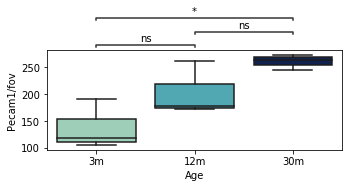

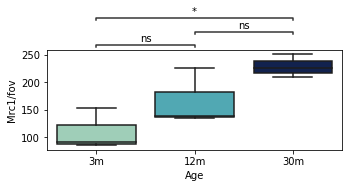

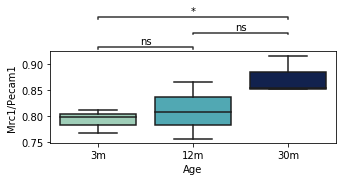

In [71]:
plt.figure(figsize=(5, 3))
g = sns.boxplot(data = df, order = ['3m','12m','30m'],
           x = 'Age', y='Pecam1/fov', palette=age_color_dict)
add_stat_annotation(g,data=df, x = 'Age', y='Pecam1/fov', order = ['3m','12m','30m'],
                        box_pairs=[('3m','12m'),('12m','30m'),('3m','30m')],
                        test='t-test_welch', loc='outside', verbose=2, text_format='star')
plt.tight_layout()
plt.savefig('./Endo_validation_Pecam1.pdf')

plt.figure(figsize=(5, 3))
h = sns.boxplot(data = df, order = ['3m','12m','30m'],
           x = 'Age', y='Mrc1/fov', palette=age_color_dict)
add_stat_annotation(h,data=df, x = 'Age', y='Mrc1/fov', order = ['3m','12m','30m'],
                        box_pairs=[('3m','12m'),('12m','30m'),('3m','30m')],
                        test='t-test_welch', loc='outside', verbose=2, text_format='star')
plt.tight_layout()
plt.savefig('./Endo_validation_Mrc1.pdf')

plt.figure(figsize=(5, 3))
k = sns.boxplot(data = df, order = ['3m','12m','30m'],
           x = 'Age', y='Mrc1/Pecam1', palette=age_color_dict)
add_stat_annotation(k,data=df, x = 'Age', y='Mrc1/Pecam1', order = ['3m','12m','30m'],
                        box_pairs=[('3m','12m'),('12m','30m'),('3m','30m')],
                        test='t-test_welch', loc='outside', verbose=2, text_format='star')
plt.tight_layout()
plt.savefig('./Endo_validation_Mrc1Pecam1.pdf')